In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes("deep")

# Read CSV Files

In [2]:
movies = pd.read_csv("./Datasets/tmdb movie database cleaned/movies.csv")
movie_genre = pd.read_csv(
    "./Datasets/tmdb movie database cleaned/movie_genre.csv"
)
movie_crew = pd.read_csv(
    "./Datasets/tmdb movie database cleaned/movie_crew.csv"
)
movies

,id,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,director_experience_level,is_good
0,19995,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,medium,True
1,285,300000000,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,medium,False
2,206647,245000000,en,Spectre,107.376788,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,medium,False
3,49026,250000000,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,medium,True
4,49529,260000000,en,John Carter,43.926995,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,low,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,220000,es,El Mariachi,14.269792,1992-09-04,2040920,81.0,Released,El Mariachi,6.6,238,high,False
4799,72766,9000,en,Newlyweds,0.642552,2011-12-26,0,85.0,Released,Newlyweds,5.9,5,low,False
4800,231617,0,en,"Signed, Sealed, Delivered",1.444476,2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered",7.0,6,low,True
4801,126186,0,en,Shanghai Calling,0.857008,2012-05-03,0,98.0,Released,Shanghai Calling,5.7,7,low,False


# Visualization 1

#### Filter Columns and Rows

In [3]:
movie_rating = movies.loc[movies["vote_count"] >= 30, ["id", "is_good"]].merge(
    movie_genre.loc[:, ["movie_id", "genre_name"]],
    how="left",
    left_on = "id",
    right_on = "movie_id"
)
movie_rating

,id,is_good,movie_id,genre_name
0,19995,True,19995,Action
1,19995,True,19995,Adventure
2,19995,True,19995,Fantasy
3,19995,True,19995,Science Fiction
4,285,False,285,Adventure
...,...,...,...,...
10359,14337,False,14337,Drama
10360,14337,False,14337,Thriller
10361,9367,False,9367,Action
10362,9367,False,9367,Crime


#### Compute % Good Movies by Genre

In [4]:
# Aggregate by Genre and Rename Columns
grouped_rating_by_genre = movie_rating.groupby(["genre_name"])["is_good"]
good_movies_by_genre = grouped_rating_by_genre.agg(
    [lambda x: 100 * x.sum() / x.count(), "count"]
)
good_movies_by_genre = good_movies_by_genre.reset_index()
good_movies_by_genre.columns = ["genre_name", "% Good Movies", "Total Count"]

# Filter and Sort
good_movies_by_genre = good_movies_by_genre[
    good_movies_by_genre["Total Count"] >= 50
]
good_movies_by_genre = good_movies_by_genre.sort_values(
    by = "% Good Movies",
    ascending = False
)

# Show
good_movies_by_genre

,genre_name,% Good Movies,Total Count
18,War,46.774194,124
10,History,42.603550,169
19,Western,42.424242,66
6,Drama,32.185792,1830
12,Music,29.496403,139
2,Animation,26.570048,207
4,Crime,23.696682,633
13,Mystery,22.327044,318
14,Romance,22.096317,706
1,Adventure,20.331950,723


#### Create Horizontal Bar Chart

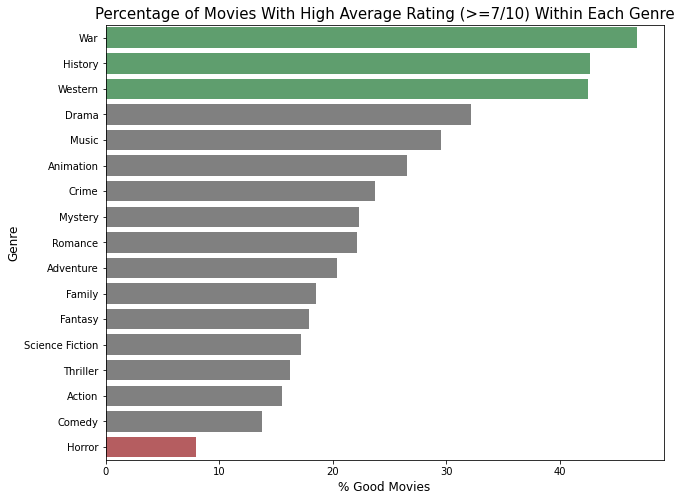

In [5]:
# Set up Figure
fig = plt.figure(figsize=(10,8))

# Set up Colors
color = ["grey"] * len(good_movies_by_genre)
color[0:3] = ["g"]*3
color[-1] = "r"

# Draw Bar Chart
bar = sns.barplot(
    x = good_movies_by_genre["% Good Movies"],
    y = good_movies_by_genre["genre_name"],
    hue = good_movies_by_genre["genre_name"],
    palette = color
)

# Set Titles
plt.title(
    "Percentage of Movies With High Average Rating (>=7/10) Within Each Genre",
    fontsize = 15
)
plt.ylabel("Genre", fontsize = 12)
plt.xlabel("% Good Movies", fontsize = 12)

# Save and Show Plot
plt.savefig(
    "./Plots/Percentage of Good Movies by Genre.png",
    bbox_inches='tight',
    dpi=200,
    transparent = False,
    facecolor = "white"
)

# Visualization 2

#### Cross-tabulating Genres and Selecting Relevant Genres

In [6]:
# Cross-tabulate
movie_genre_crosstab = pd.crosstab(
    movie_genre["movie_id"],
    movie_genre["genre_name"]
)

# Select relevant Genres
movie_genre_crosstab = movie_genre_crosstab.loc[:,
    [
        "Horror", "Comedy", "Action", "Thriller",
        "Drama", "Western", "History", "War"
    ]
]

#### Drawing a Correlation Heat Map

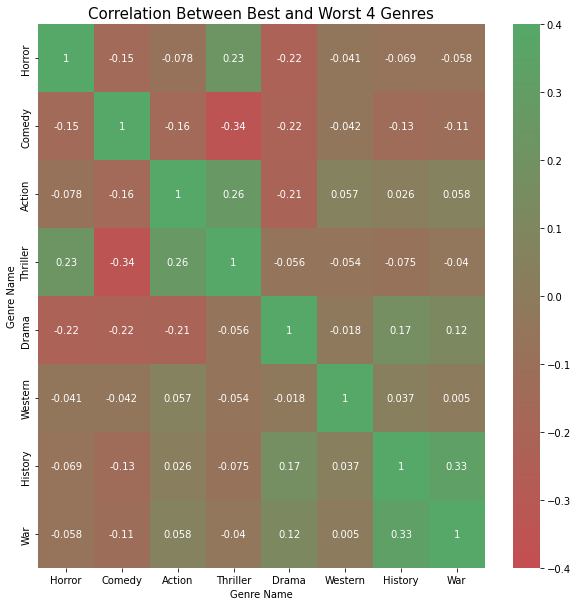

In [7]:
# Set up Figure
plt.figure(figsize=(10,10))

# Plot Heat Map
sns.heatmap(
    movie_genre_crosstab.corr(),
    annot = True,
    vmin=-0.4, 
    vmax=0.4,
    cmap=sns.color_palette("blend:r,g", as_cmap=True)
)

# Set Titles
plt.title("Correlation Between Best and Worst 4 Genres", fontsize=15)
plt.xlabel("Genre Name")
plt.ylabel("Genre Name")

# Save and Show
plt.savefig(
    "./Plots/Correlation Between Best and Worst 4 Genres.png",
    bbox_inches='tight',
    dpi=200,
    transparent = False,
    facecolor = "white"
)